In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('FinancialMarketData.csv')

In [4]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,6.6710,6.657,6.4280,5.4260,5.78100,6.121,5.541,4.316,2.890,6.321,5.777,4.495,2.422,1.709,0.346,4.5350,4.7700,6.5240,870.94,474.045,990.75,546.04,305.057,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,6.7470,6.748,6.4650,5.3780,5.80300,6.254,5.644,4.321,3.030,6.459,5.889,4.535,2.418,1.765,0.349,4.7460,4.9750,6.6130,869.33,473.223,990.48,545.68,305.303,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,6.6340,6.692,6.4320,5.5620,5.81900,6.045,5.515,4.270,3.150,6.281,5.760,4.511,2.259,1.625,0.293,4.6910,4.9000,6.5210,873.50,472.723,997.68,546.70,306.181,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,6.4230,6.619,6.5740,5.7080,5.88500,5.944,5.459,4.326,3.300,6.188,5.710,4.540,2.330,1.770,0.364,4.5930,4.7940,6.4670,871.22,473.255,997.91,547.38,305.997,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,6.2310,6.613,6.6780,5.6770,5.89100,5.850,5.482,4.390,3.260,6.118,5.728,4.638,2.481,1.919,0.359,4.5480,4.7680,6.4720,872.39,474.733,998.77,548.25,309.476,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,1.622,0.1452,0.0025,0.10738,0.228,-0.343,-0.716,-0.480,1.603,0.601,-0.415,0.621,0.077,-0.140,1.2864,1.2610,0.0401,2301.89,1330.717,3394.38,2346.07,1500.919,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,1.706,0.1465,0.0101,0.10850,0.265,-0.288,-0.698,-0.483,1.670,0.679,-0.382,0.648,0.085,-0.145,1.3580,1.3210,0.0686,2297.31,1333.400,3390.19,2352.95,1496.094,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,1.658,0.1566,0.0152,0.11038,0.233,-0.317,-0.706,-0.481,1.690,0.691,-0.377,0.678,0.108,-0.121,1.3353,1.2994,0.0699,2302.52,1335.609,3420.70,2370.97,1510.465,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,1.616,0.1589,0.0101,0.11225,0.262,-0.293,-0.707,-0.483,1.756,0.748,-0.363,0.667,0.101,-0.133,1.3053,1.2655,0.0436,2309.15,1341.393,3431.10,2371.86,1515.820,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [6]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,6.657,6.428,5.426,5.781,6.121,5.541,4.316,2.89,6.321,5.777,4.495,2.422,1.709,0.346,4.535,4.770,6.524,870.94,474.045,990.75,546.04,305.057,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,6.748,6.465,5.378,5.803,6.254,5.644,4.321,3.03,6.459,5.889,4.535,2.418,1.765,0.349,4.746,4.975,6.613,869.33,473.223,990.48,545.68,305.303,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,6.692,6.432,5.562,5.819,6.045,5.515,4.270,3.15,6.281,5.760,4.511,2.259,1.625,0.293,4.691,4.900,6.521,873.50,472.723,997.68,546.70,306.181,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,6.619,6.574,5.708,5.885,5.944,5.459,4.326,3.30,6.188,5.710,4.540,2.330,1.770,0.364,4.593,4.794,6.467,871.22,473.255,997.91,547.38,305.997,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,6.613,6.678,5.677,5.891,5.850,5.482,4.390,3.26,6.118,5.728,4.638,2.481,1.919,0.359,4.548,4.768,6.472,872.39,474.733,998.77,548.25,309.476,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [5]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,3.908361,3.266748,1.990379,1.575180,1.836137,3.039282,2.448365,1.431110,1.363676,4.426725,3.680791,2.104911,1.724494,0.904126,0.150180,3.450157,3.445772,2.299772,1637.293510,883.615477,2077.306949,1231.258119,804.720667,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,1.178584,1.332464,1.710305,1.802895,1.909024,1.779526,1.851558,1.876061,1.721894,1.274729,1.465289,1.700726,0.720026,0.643985,0.297519,1.263211,1.366181,2.128524,417.229338,241.507115,690.731794,553.121000,370.251989,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,1.163000,0.508000,0.107300,-0.038000,0.105750,-0.471000,-0.794000,-0.968000,-0.498000,1.386000,0.512000,-0.458000,0.056000,-0.291000,-0.351000,0.547000,0.489200,-0.163300,869.330000,472.723000,986.940000,491.080000,294.367000,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,2.960000,2.195500,0.576000,0.090000,0.241000,1.288000,0.539000,-0.382500,-0.229500,3.395000,2.329500,0.403500,1.055000,0.253500,-0.031000,2.336000,2.185000,0.466000,1251.130000,683.896500,1509.730000,743.535000,479.388500,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,4.100000,3.115000,1.522000,0.958000,1.214000,3.572000,2.994000,1.057000,0.437000,4.839000,4.098000,2.214000,1.944000,1.038000,0.097000,4.112000,4.114000,0.936000,1723.800000,855.517000,2045.550000,1145.150000,765.248000,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,4.844500,4.345000,2.927500,2.335500,2.502500,4.582500,4.080000,3.121000,2.890000,5.312500,4.683500,3.523000,2.315500,1.429500,0.230000,4.486000,4.611000,4.488000,2005.330000,1099.705500,2624.980000,1663.945000,1111.224500,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,6.747000,6.748000,6.872000,6.414000,6.776000,6.254000,5.644000,5.264000,5.730000,7.500000,7.209000,7.015000,3.128000,1.968000,1.080000,5.075000,5.242000,6.613000,2325.860000,1350.500000,3550.430000,2378.530000,1525.790000,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [7]:
df[df['Y']==0].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,17.300263,3.896549,3.270061,2.021456,1.599518,1.820856,2.908183,2.313506,1.303573,1.202072,4.230992,3.453836,1.835333,1.681562,0.859324,0.132787,3.384553,3.374560,2.260985,1660.073970,901.667633,2132.510297,1285.861659,842.730654,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
std,0.0,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,5.194502,1.141619,1.283589,1.680322,1.772110,1.874724,1.762839,1.839964,1.841740,1.649018,1.196397,1.383427,1.616141,0.746508,0.666521,0.301040,1.272939,1.370482,2.125250,412.535699,239.827768,682.030867,551.115020,368.706351,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759
min,0.0,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,9.430000,1.185700,0.508000,0.107300,-0.010000,0.105750,-0.204000,-0.708000,-0.919000,-0.498000,1.386000,0.512000,-0.458000,0.056000,-0.291000,-0.351000,0.598100,0.489200,-0.163300,869.330000,472.723000,990.460000,495.320000,301.362000,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,13.120000,2.959500,2.251750,0.613000,0.093000,0.231250,1.176250,0.433000,-0.543250,-0.337250,3.259250,2.133250,0.185750,0.853500,0.085500,-0.123750,2.018000,1.946500,0.461500,1260.815000,690.375750,1517.960000,783.765000,505.618750,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,16.010000,4.108000,3.068500,1.583500,1.009500,1.218000,3.330500,2.655500,0.892000,0.346000,4.587500,3.943500,1.814500,1.908500,0.931500,0.092500,3.998000,4.017000,0.857000,1738.445000,882.947500,2089.980000,1248.845000,830.660500,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,20.747500,4.815000,4.318750,2.955750,2.363250,2.501500,4.467500,3.995000,2.715500,2.347500,5.104750,4.446250,2.919000,2.328250,1.443250,0.200000,4.483250,4.588000,4.470500,2036.495000,1122.158000,2722.047500,1735.510000,1154.240500,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,32.880000,6.747000,6.748000,6.788000,6.414000,6.665000,6.254000,5.644000,5.264000,5.730000,6.693000,5.889000,5.462000,3.128000,1.968000,1.080000,5.060000,5.242000,6.613000,2325.860000,1350.500000,3550.430000,2378.530000,1525.790000,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [8]:
df[df['Y']==1].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,3.951921,3.254532,1.875776,1.485430,1.892491,3.522743,2.945692,1.901435,1.959633,5.14854,4.517747,3.099051,1.882819,1.069346,0.214321,3.692089,3.708382,2.442812,1553.284557,817.043392,1873.730042,1029.893165,664.548814,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,1.307586,1.501918,1.815720,1.913381,2.033678,1.760801,1.812559,1.929802,1.852790,1.29721,1.457602,1.637352,0.587340,0.521897,0.275397,1.198533,1.320146,2.138971,424.517906,236.443387,685.865129,513.489650,341.775557,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,1.163000,0.571000,0.130900,-0.038000,0.140500,-0.471000,-0.794000,-0.968000,-0.472000,1.57300,0.699000,-0.379000,0.312000,-0.113000,-0.251000,0.547000,0.491000,-0.105800,872.390000,474.733000,986.940000,491.080000,294.367000,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,2.980000,2.006000,0.302000,0.087000,0.257000,2.359000,1.541000,0.091000,0.326000,4.91200,4.249000,2.037000,1.812000,0.822000,0.050000,3.093000,2.856000,0.511000,1122.050000,592.882000,1240.440000,555.430000,330.486000,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,4.091000,3.164000,1.029000,0.283000,0.985000,3.906000,3.153000,1.470000,1.273000,5.41500,4.846000,3.448000,1.995000,1.221000,0.127000,4.261000,4.316000,1.445000,1564.440000,768.478000,1662.020000,881.000000,586.794000,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,5.184000,4.501000,2.866000,2.207000,2.506000,5.106000,4.613000,3.877000,3.615000,5.97100,5.429000,4.296000,2.275000,1.413000,0.392000,4.490000,4.679000,4.583000,1860.340000,975.957000,2303.900000,1337.600000,879.031000,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,6.246000,6.613000,6.872000,6.361000,6.776000,5.900000,5.562000,5.186000,5.160000,7.50000,7.209000,7.015000,2.812000,1.919000,0.986000,5.075000,5.237000,6.472000,2321.740000,1317.256000,3478.600000,2230.010000,1436.257000,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [9]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,0.019255,-0.004776,-0.034909,-0.025935,0.015379,0.141537,0.139933,0.130607,0.180311,0.295000,0.297573,0.304528,0.114555,0.133660,0.112314,0.099777,0.100142,0.035010,-0.104897,-0.143607,-0.153544,-0.189661,-0.197232,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,-0.868696,-0.893317,-0.742875,-0.643295,-0.642887,-0.828390,-0.835680,-0.837306,-0.816037,-0.438149,-0.474818,-0.594534,-0.622158,-0.684303,-0.440619,-0.741511,-0.783369,-0.896144,0.922561,0.879618,0.881462,0.851359,0.861813,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,-0.015927,-0.016744,-0.058576,-0.106247,-0.141989,-0.051631,-0.052426,-0.103871,-0.164457,-0.045534,-0.055275,-0.126404,-0.091052,-0.086513,-0.264406,-0.120088,-0.116439,-0.078089,0.071001,0.091600,0.129199,0.141863,0.131176,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,0.390852,0.391498,0.324485,0.316566,0.382483,0.435070,0.460335,0.511614,0.497767,0.216254,0.269495,0.418313,0.468681,0.529466,0.666506,0.452088,0.485795,0.523993,-0.363202,-0.365687,-0.375367,-0.377746,-0.365869,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,0.256228,0.178731,0.028815,0.043997,0.092995,0.321041,0.320875,0.277763,0.234478,0.411076,0.430051,0.401355,0.570971,0.524412,0.623228,0.478155,0.450480,0.197512,-0.190604,-0.260545,-0.274922,-0.282961,-0.248420,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,0.187296,0.274784,0.387242,0.351606,0.307930,0.087873,0.102974,0.192595,0.245495,-0.100070,-0.086766,0.034774,-0.176492,-0.133376,-0.318889,-0.098475,-0.056631,0.264384,-0.261856,-0.174728,-0.157217,-0.120882,-0.158966,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,0.260793,0.384427,0.496548,0.455076,0.438144,0.143504,0.172881,0.321285,0.364440,-0.296316,-0.245225,-0.015348,-0.048206,0.003475,0.030774,0.025687,0.088961,0.459662,-0.302912,-0.198762,-0.200088,-0.159244,-0.180781,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,0.547876,0.502849,0.338006,0.314838,0.358554,0.602251,0.613232,0.603435,0.553107,0.426671,0.472687,0.552392,0.731792,0.732133,0.763124,0.695556,0.696851,0.598820,-0.543632,-0.568331,-0.576845,-0.585356,-0.562720,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,-0.194274,-0.268299,-0.346334,-0.291911,-0.247244,-0.143429,-0.158079,-0.208169,-0.226246,0.171692,0.158882,0.021452,0.130170,0.041538,0.261732,0.019102,-0.027489,-0.324135,0.324734,0.243818,0.228943,0.233435,0.268926,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.86

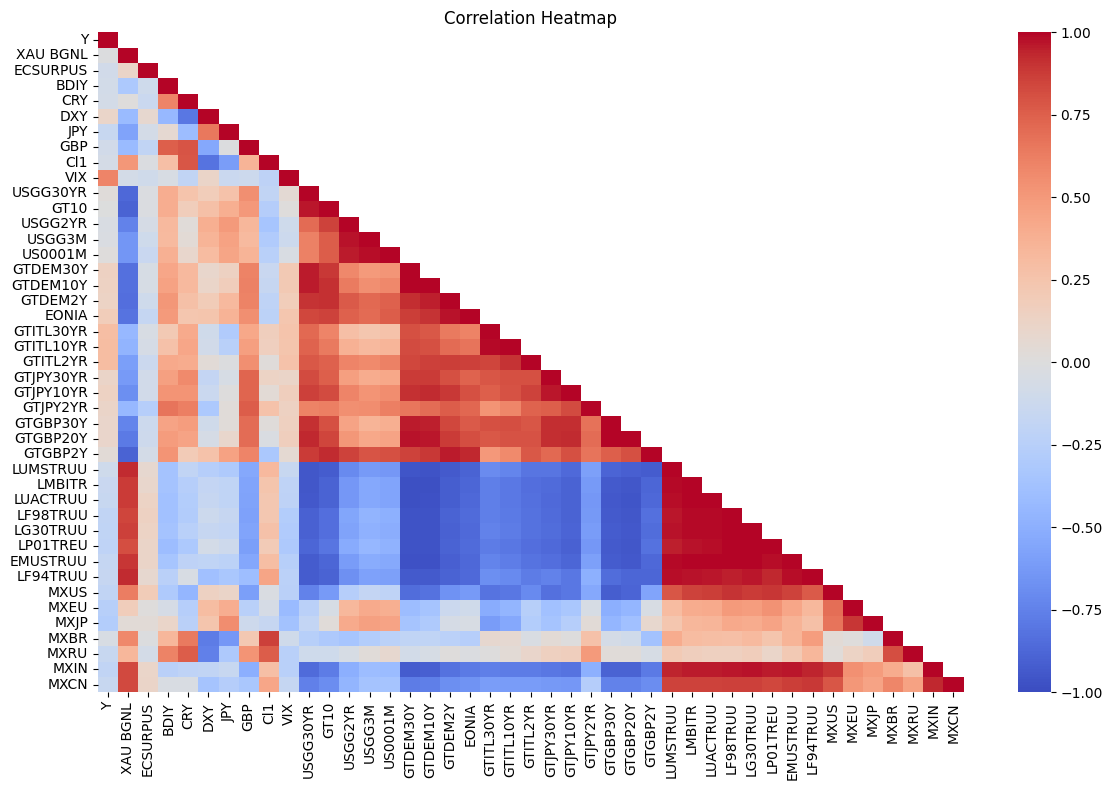

In [12]:
corr_matrix = numeric_df.corr()

# Get the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = np.triu(corr_matrix)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap using seaborn
sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)

# Add title and layout
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
correlations = numeric_df.corr()['Y'].sort_values(ascending = False)
print("Top feature correlations with target")
print(correlations)

Top feature correlations with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: f

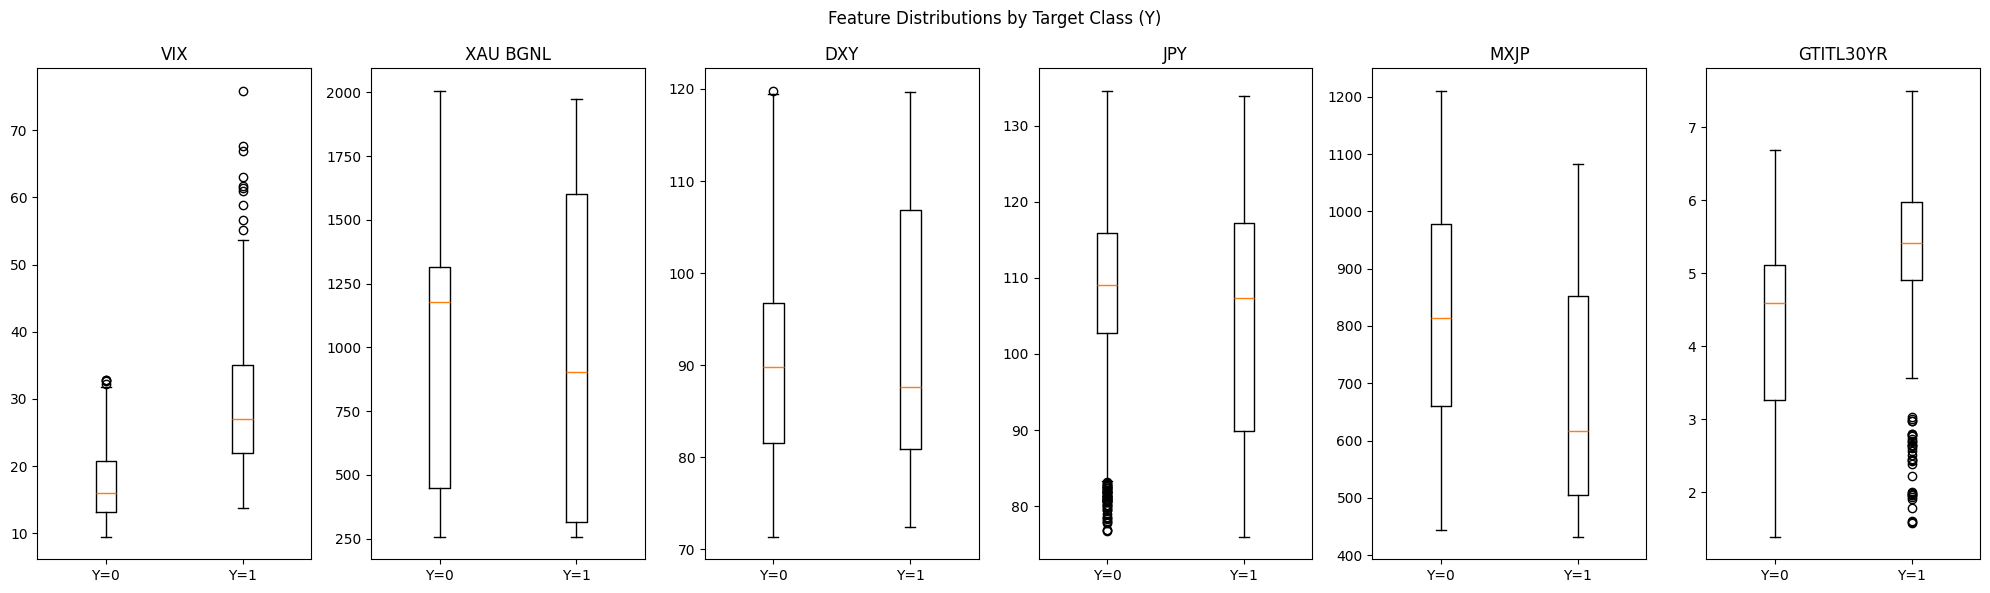

In [16]:
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'JPY', "MXJP", "GTITL30YR"]

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
  data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
  axes[i].boxplot(data, labels=['Y=0', 'Y=1'])
  axes[i].set_title(col)
  axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

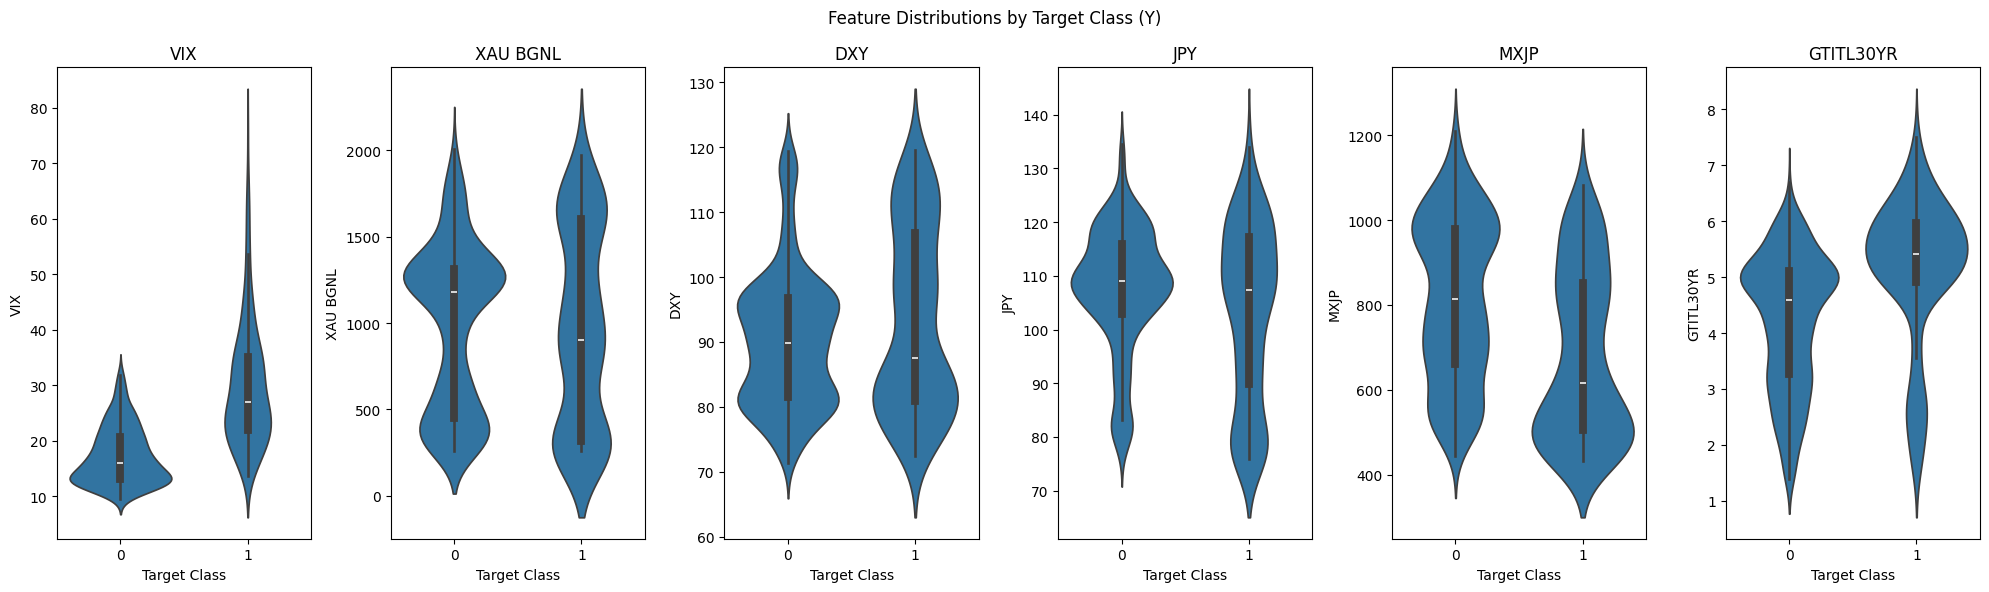

In [17]:
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'JPY', "MXJP", "GTITL30YR"]

# Create figure with subplots
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class (Y)')

# Create violin plots
for i, col in enumerate(cols_to_plot):
  sns.violinplot(
    data=df,
    x='Y',
    y=col,
    ax=axes[i],
    inner='box'  # Shows quartile boxes inside violin
  )
  axes[i].set_title(col)
  axes[i].set_xlabel('Target Class')

plt.tight_layout()
plt.show()

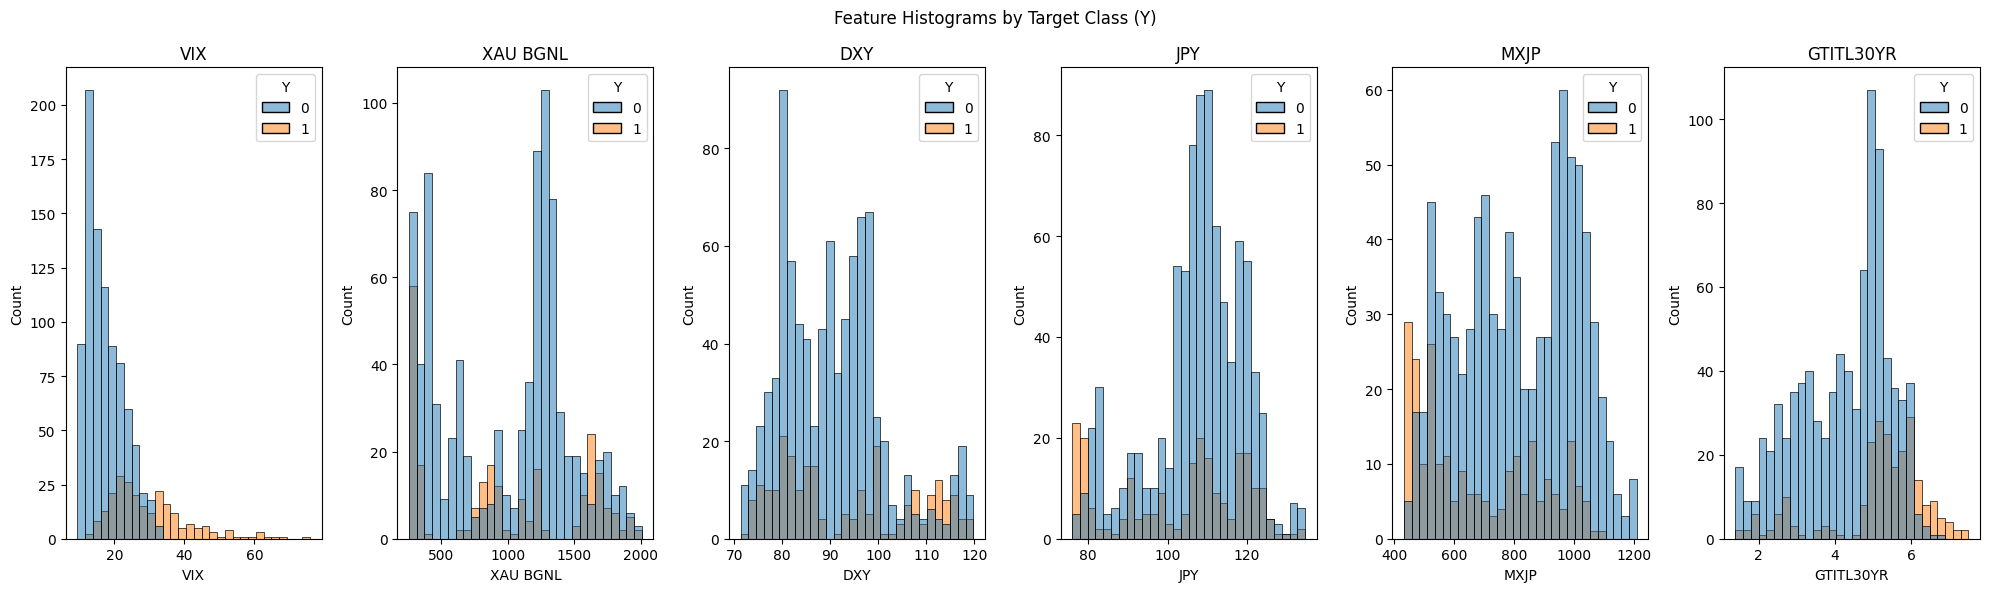

In [19]:
cols_to_plot = ["VIX", 'XAU BGNL', 'DXY', 'JPY', "MXJP", "GTITL30YR"]

# Create figure with subplots
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Histograms by Target Class (Y)')

# Create histogram plots
for i, col in enumerate(cols_to_plot):
  sns.histplot(
    data=df,
    x=col,
    hue='Y',
    ax=axes[i],
    multiple="layer",
    alpha=0.5,
    bins=30
  )
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Training and Testing the Data

In [20]:
# Prepare features (X) and target (y)
X = df[['VIX']]  # Feature: VIX
y = df['Y']      # Target: Y (1 = anomaly, 0 = normal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223


Model Coefficients:
VIX coefficient: 0.2327
Intercept: -6.4332


In [24]:
# Prepare features (X) and target (y)
X = df[['VIX']]  # Feature: VIX
y = df['Y']      # Target: Y (1 = anomaly, 0 = normal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000, C=0.1, class_weight='balanced', solver = 'lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223


Model Coefficients:
VIX coefficient: 0.2392
Intercept: -5.2543


In [25]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

# Prepare features (X)
X = df[['VIX']]

# Create and train the Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=200,  # Number of trees
    contamination=0.10,  # Expected proportion of outliers (10%)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit and predict
# predict() returns 1 for inliers, -1 for outliers
predictions = iso_forest.fit_predict(X)

# Convert predictions to binary format (0 for normal, 1 for anomaly)
# This makes it consistent with your original labels
y_pred = np.where(predictions == -1, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Calculate and print anomaly scores
anomaly_scores = iso_forest.score_samples(X)
print("\nAnomaly Score Statistics:")
print(f"Mean score: {np.mean(anomaly_scores):.4f}")
print(f"Min score: {np.min(anomaly_scores):.4f}")
print(f"Max score: {np.max(anomaly_scores):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       874
           1       0.77      0.36      0.49       237

    accuracy                           0.84      1111
   macro avg       0.81      0.67      0.70      1111
weighted avg       0.83      0.84      0.82      1111


Anomaly Score Statistics:
Mean score: -0.4733
Min score: -0.8160
Max score: -0.4283


In [30]:
# Prepare features (X) and target (y)
X = df[['VIX', 'DXY', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY2YR']]  # Feature:
y = df['Y']      # Target: Y (1 = anomaly, 0 = normal)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000, C=0.10, class_weight='balanced', solver = 'lbfgs', n_jobs= -1 )
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print model coefficients
print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       177
           1       0.54      0.80      0.65        46

    accuracy                           0.82       223
   macro avg       0.74      0.81      0.76       223
weighted avg       0.86      0.82      0.83       223


Model Coefficients:
VIX coefficient: 0.2387
Intercept: -8.1582


              precision    recall  f1-score   support

           0       0.89      0.97      0.92       177
           1       0.80      0.52      0.63        46

    accuracy                           0.87       223
   macro avg       0.84      0.74      0.78       223
weighted avg       0.87      0.87      0.86       223



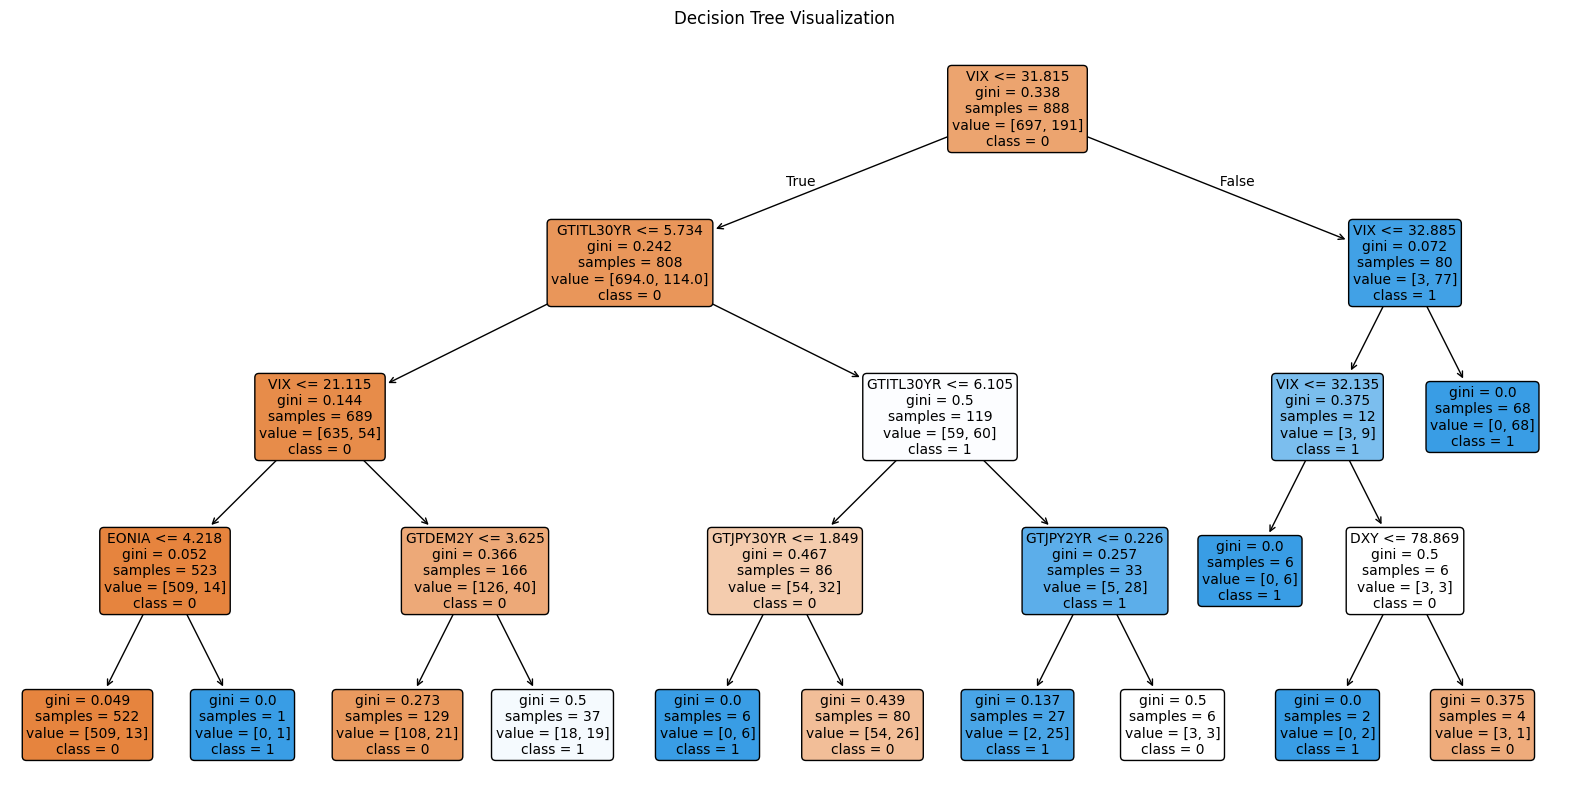

In [32]:
# Visualize decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Print the classification report
print(classification_report(y_test, dt.predict(X_test)))

# Create a figure with a larger size for better visibility
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    dt,
    feature_names=X.columns,  # Feature names for splitting decisions
    class_names=['0', '1'],  # Class names for labels
    filled=True,  # Fill nodes with colors based on class
    rounded=True,  # Use rounded corners for clarity
    fontsize=10  # Adjust font size for readability
)

# Add a title and display the tree
plt.title("Decision Tree Visualization")
plt.show()
